<a href="https://colab.research.google.com/github/Nirrax/zed_lab/blob/main/ZED_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab.3 Eksploracja danych – przykłady

Zad.1

Generowanie danych

In [ ]:
import numpy as np
# Ustawienie ziarna losowości dla powtarzalności
np.random.seed(42)

In [ ]:
# Dane: pierwsza próbka N(3, 0.5)
n1 = 50
mu1 = 3
sigma1 = 0.5
data1 = np.random.normal(mu1, sigma1, n1)
data1[:10]

array([3.24835708, 2.93086785, 3.32384427, 3.76151493, 2.88292331,
       2.88293152, 3.78960641, 3.38371736, 2.76526281, 3.27128002])

In [ ]:
# Dane: druga próbka N(-1, 1.5)
n2 = 50
mu2 = -1
sigma2 = 1.5
data2 = np.random.normal(mu2, sigma2, n2)
data2[:10]

array([-0.51387405, -1.57762342, -2.015383  , -0.08248557,  0.54649928,
        0.39692018, -2.25882628, -1.46381856, -0.50310485,  0.46331769])

In [ ]:
# Połączenie próbek
data = np.concatenate([data1, data2])
data[:10]

array([3.24835708, 2.93086785, 3.32384427, 3.76151493, 2.88292331,
       2.88293152, 3.78960641, 3.38371736, 2.76526281, 3.27128002])

Funkcja Estymatora jądrowego

In [ ]:
def kernel_density_estimate(x, data):
    m = len(data)
    s_hat = np.std(data, ddof=1)  # estymator odchylenia standardowego

    # Stałe dla jądra normalnego
    Z_f = (3 / (8 * np.sqrt(np.pi)))  # Z(f)
    W_K = 1 / (2 * np.sqrt(np.pi))    # W(K)
    U_K_squared = 1 / (2 * np.sqrt(np.pi))  # U(K)^2

    # Szerokość jądra h zgodnie z podanym wzorem
    h = s_hat * ((W_K / ((U_K_squared)**2 * Z_f)) ** (1/5))

    # Jądro normalne
    def normal_kernel(u):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    # Estymator jądrowy
    kde_sum = 0
    for xi in data:
        u = (x - xi) / h
        kde_sum += normal_kernel(u)

    fx = (1 / (m * h)) * kde_sum
    return fx

Estymator własny

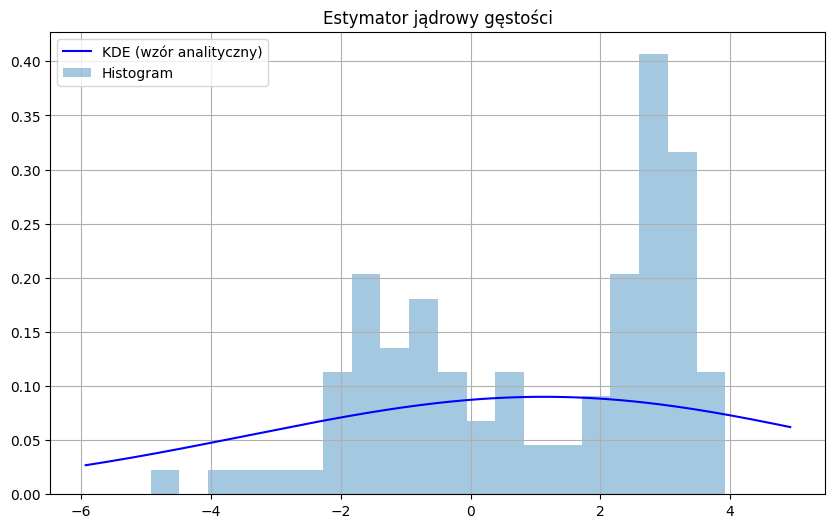

In [ ]:
import matplotlib.pyplot as plt
# Siatka x do obliczania wartości estymatora
x_vals = np.linspace(min(data)-1, max(data)+1, 200)
kde_vals = [kernel_density_estimate(x, data) for x in x_vals]

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde_vals, label='KDE (wzór analityczny)', color='blue')
plt.hist(data, bins=20, density=True, alpha=0.4, label='Histogram')
plt.legend()
plt.title("Estymator jądrowy gęstości")
plt.grid(True)
plt.show()

Estymator z biblioteki Scipy

In [ ]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 1000)
density = kde(x)
density[:10]

array([0.00828094, 0.00833696, 0.00839313, 0.00844945, 0.00850592,
       0.00856255, 0.00861934, 0.00867631, 0.00873345, 0.00879077])

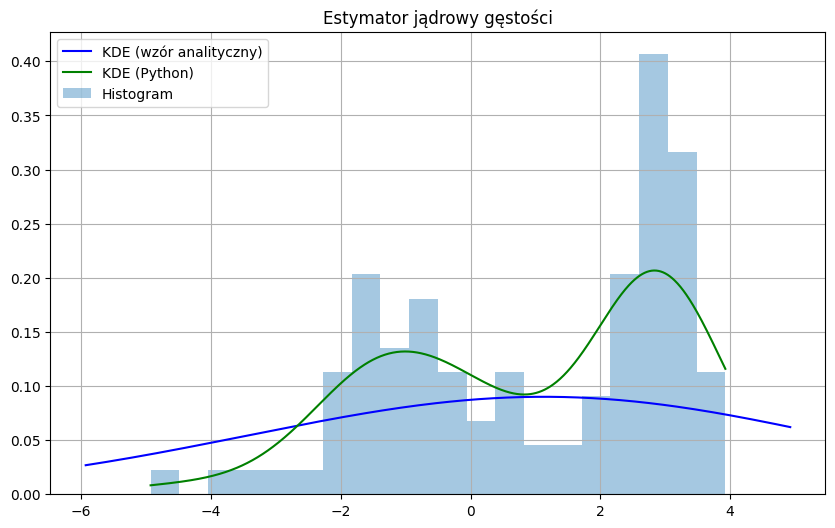

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde_vals, label='KDE (wzór analityczny)', color='blue')
plt.plot(x, density, label='KDE (Python)', color='green')
plt.hist(data, bins=20, density=True, alpha=0.4, label='Histogram')
plt.legend()
plt.title("Estymator jądrowy gęstości")
plt.grid(True)
plt.show()

Zad.2

Generowanie danych

In [ ]:
# Parametry rozkładów
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]

mean2 = [3, 1]
cov2 = [[1, 0.8], [0.8, 1]]

# Generowanie danych
n = 20
data1 = np.random.multivariate_normal(mean1, cov1, n)
data2 = np.random.multivariate_normal(mean2, cov2, n)
data = np.vstack((data1, data2)).T  # shape (2, 40) - do KDE

Wygładzenie Danych

In [ ]:
# Estymator KDE
kde = gaussian_kde(data)


# Siatka do wykresu
x, y = np.mgrid[-3:7:100j, -3:5:100j]
positions = np.vstack([x.ravel(), y.ravel()])
z = np.reshape(kde(positions).T, x.shape)

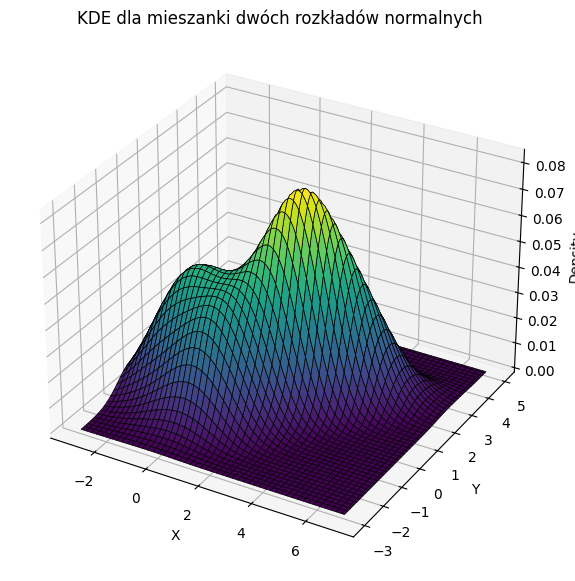

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Wykres 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
plt.title("KDE dla mieszanki dwóch rozkładów normalnych")
plt.show()

Zad.3

Import danych

In [ ]:
import pandas as pd
# Załaduj dane
df = pd.read_csv("Dane_energia.csv", sep=';', encoding='cp1250')
df.head()

,mies,dzien_mies,dzien_tyg,godzina,energia,temp_dobowa
0,Listopad,1,Piątek,1,"305,058",5
1,Listopad,1,Piątek,2,"285,228",5
2,Listopad,1,Piątek,3,"275,947",5
3,Listopad,1,Piątek,4,"277,628",5
4,Listopad,1,Piątek,5,"275,699",5


Dla każdej doby obliczyć odsetek zapotrzebowania na energię w każdej godzinie
(zapotrzebowanie w danej godzinie/suma energii dla całej doby).

In [ ]:
# Dodanie kolumny 'data'
month_map = {
    'Styczeń': 1, 'Luty': 2, 'Marzec': 3, 'Kwiecień': 4,
    'Maj': 5, 'Czerwiec': 6, 'Lipiec': 7, 'Sierpień': 8,
    'Wrzesień': 9, 'Październik': 10, 'Listopad': 11, 'Grudzień': 12
}

df['mies_num'] = df['mies'].map(month_map)
df['rok'] = 2023  # lub inny
df['datetime'] = pd.to_datetime(dict(
    year=df['rok'],
    month=df['mies_num'],
    day=df['dzien_mies'],
    hour=df['godzina']
))

df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [ ]:
from sklearn.cluster import KMeans

# Grupowanie po dniach i liczenie profilu dobowego
df['date'] = df.index.date
df['energia'] = df['energia'].astype(str).str.replace(',', '.').astype(float)

# Procentowe zużycie energii (dla każdej doby)
daily_profiles = df.groupby('date')['energia'].apply(lambda x: x / x.sum())

# Konwersja do macierzy (każdy dzień = 24h)
profile_matrix = daily_profiles.unstack().fillna(0).values

# Klasteryzacja (np. 4 klastry)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(profile_matrix)

# Dodajemy klastry z powrotem do dat
df_clusters = pd.DataFrame({
    'date': daily_profiles.unstack().index,
    'cluster': clusters
})
df.head()

,mies,dzien_mies,dzien_tyg,godzina,energia,temp_dobowa,mies_num,rok,date,weekday,energia_percent
datetime,,,,,,,,,,,
2023-01-01 01:00:00,Styczeń,1,Środa,1,338.073,"-8,5",1,2023,2023-01-01,6,0.046557
2023-01-01 02:00:00,Styczeń,1,Środa,2,320.177,"-8,5",1,2023,2023-01-01,6,0.044092
2023-01-01 03:00:00,Styczeń,1,Środa,3,309.078,"-8,5",1,2023,2023-01-01,6,0.042564
2023-01-01 04:00:00,Styczeń,1,Środa,4,301.067,"-8,5",1,2023,2023-01-01,6,0.041461
2023-01-01 05:00:00,Styczeń,1,Środa,5,294.242,"-8,5",1,2023,2023-01-01,6,0.040521


Zilustrować na wykresie liniowym profile dobowego zapotrzebowania na energię dla
kilku wybranych dni.

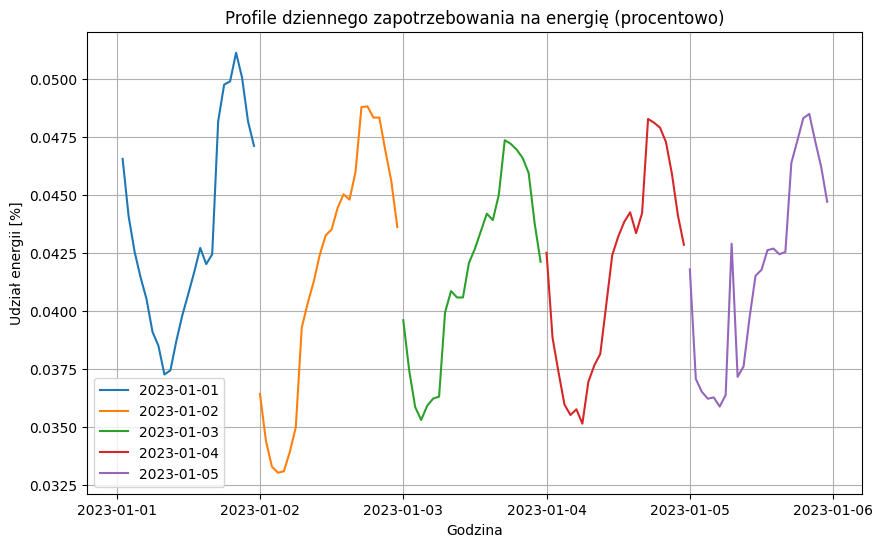

In [ ]:
# Zmieniamy profile dzienne na DataFrame
daily_df = daily_profiles.unstack()  # rows: date, cols: godziny

# Rysujemy kilka wybranych dni (np. pierwsze 5)
sample_days = daily_df.index[:5]

plt.figure(figsize=(10,6))
for day in sample_days:
    plt.plot(daily_df.columns, daily_df.loc[day], label=str(day))

plt.title("Profile dziennego zapotrzebowania na energię (procentowo)")
plt.xlabel("Godzina")
plt.ylabel("Udział energii [%]")
plt.legend()
plt.grid()
plt.show()

Zilustrować na wykresie liniowym profile dobowego zapotrzebowania na energię dla
wybranego dnia tygodnia (np. wszystkich wtorków). Następnie przedstawić na wykresach
każdy dzień tygodnia oddzielnie.

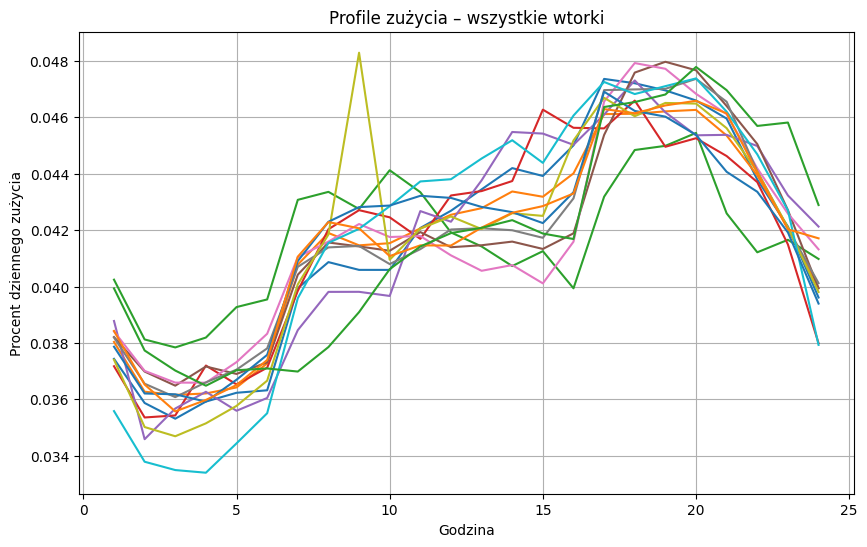

In [ ]:
# Dodaj dzień tygodnia (0=poniedziałek, 6=niedziela)
df['weekday'] = df.index.weekday
df['date'] = df.index.date  # znów to potrzebne
df['energia_percent'] = df.groupby('date')['energia'].transform(lambda x: x / x.sum())

# Wybieramy np. wtorki (weekday = 1)
tuesday = df[df['weekday'] == 1]

# Grupujemy: dzień + godzina → średni profil
pivot = tuesday.pivot_table(index='date', columns='godzina', values='energia_percent')

plt.figure(figsize=(10,6))
for day in pivot.index:
    plt.plot(pivot.columns, pivot.loc[day], label=str(day))

plt.title("Profile zużycia – wszystkie wtorki")
plt.xlabel("Godzina")
plt.ylabel("Procent dziennego zużycia")
plt.grid()
plt.show()

Dokonać klasteryzacji dni (względem odsetków zużycia).

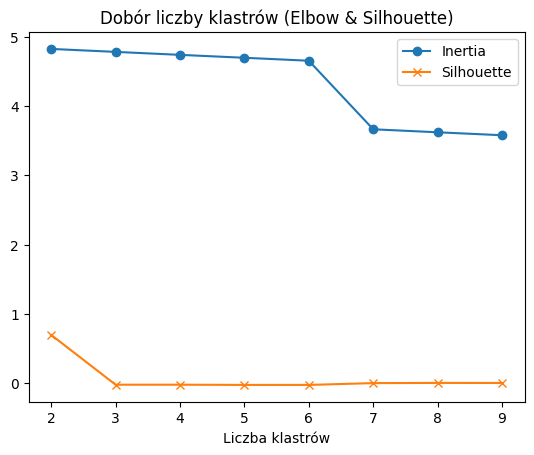

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Przygotowujemy macierz – jeden dzień = 24-wymiarowy wektor
X = daily_df.fillna(0).values

# Dobór liczby klastrów – wykres łokcia
inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(X, model.labels_))

plt.plot(K_range, inertias, marker='o', label='Inertia')
plt.plot(K_range, silhouettes, marker='x', label='Silhouette')
plt.legend()
plt.title("Dobór liczby klastrów (Elbow & Silhouette)")
plt.xlabel("Liczba klastrów")
plt.show()

In [ ]:
# Załóżmy, że wybraliśmy 4 klastry
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Przypisz etykiety do dat
cluster_series = pd.Series(clusters, index=daily_df.index)

# Zmiany klastra
cluster_changes = (cluster_series != cluster_series.shift()).sum()

# Długość pobytu w jednym klastrze
stays = cluster_series.groupby((cluster_series != cluster_series.shift()).cumsum()).size()
avg_stay = stays.mean()

print(f"Liczba zmian klastrów: {cluster_changes}")
print(f"Średnia długość pobytu w klastrze: {avg_stay:.2f} dni")

Liczba zmian klastrów: 6
Średnia długość pobytu w klastrze: 15.67 dni


In [ ]:
elasticity_score = cluster_changes / len(cluster_series)
print(f"Miara elastyczności klienta: {elasticity_score:.2f}")

Miara elastyczności klienta: 0.06
